# Data Version Control with Data Version Control: The Daughter of All Demos
Demo by Wenqi Cao and David Streuli

## Structure
1. Introduction
2. How to Set Up DVC
3. Setting Up a Pipeline and Tracking Changes
4. Conclusion
5. Take Home Message

## Introduction
![Alt Text](./dvc.png)
### What Is DVC
- Open-source tool designed for version control of datasets and ML models
- Works alongside Git
- Automatically detects changes in tracked files
### Why Should We Use It
- Dynamic datasets: Datasets evolve over time
- Large datasets: DVC can handle large files
- Change detection
- Versioning


## How to Setup DVC

First install DVC.

In [95]:
%pip install dvc

Note: you may need to restart the kernel to use updated packages.


Initialise a DVC project. This will create a new directory `/.dvc`which contains configuration files and metadata.

In [96]:
!dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


We will use Google Drive for remote storage and need to install an additional dependency for this.

In [97]:
%pip install "dvc[gdrive]"

Note: you may need to restart the kernel to use updated packages.


We link the folder on our Google Drive.

In [98]:
!dvc remote add -d gdrive_remote gdrive://1nwS0cuebPIGgrNYEdOC8v2ykgIi2ISKQ

Setting 'gdrive_remote' as a default remote.


In [99]:
!dvc remote list

gdrive_remote	gdrive://1nwS0cuebPIGgrNYEdOC8v2ykgIi2ISKQ


Set the credentials. 

In [100]:
!dvc remote modify gdrive_remote gdrive_client_id 'client-id'
!dvc remote modify gdrive_remote gdrive_client_secret 'client-secret'

## Remote Storage and Data Tracking

In [101]:
!dvc add data/bikesharing/train/bikeshare_v1.0.txt
!dvc add data/bikesharing/validation/validation.txt

⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/davidstreuli/Desktop/dvc-demo/dvc-demo/.dvc/cache
                                                                                
!
  0%|          |Adding data/bikesharing/train/bikeshar0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/davidstreuli/Deskt0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 37.38file/s]

To track the changes with git, run:

	git add data/bikesharing/train/.gitignore data/bikesharing/train/bikeshare_v1.0.txt.dvc

To enable auto staging, run:

	dvc config core.autostage true
⠋ Checking graph                                       core>
Adding...                       

In [102]:
!dvc push

Pushing
!
  0% Checking cache in '1nwS0cuebPIGgrNYEdOC8v2ykgIi2ISKQ/files/md5'| |0/? [00:0
                                                                                
!
  0% Checking cache in '/Users/davidstreuli/Desktop/dvc-demo/dvc-demo/.dvc/cache
                                                                                
!
  0%|          |Pushing to gdrive                     0/2 [00:00<?,     ?file/s]
  0%|          |Pushing to gdrive                     0/2 [00:00<?,     ?file/s]

!

  0%|          |/Users/davidstreuli/Desktop/dvc-0.00/958k [00:00<?,        ?B/s]

  1%|          |/Users/davidstreuli/Desktop8.00k/958k [00:02<05:36,    2.89kB/s]

                                                                                
 50%|█████     |Pushing to gdrive                 1/2 [00:04<00:03,  3.88s/file]

!

  0%|          |/Users/davidstreuli/Desktop/dvc0.00/40.6k [00:00<?,        ?B/s]

 20%|█▉        |/Users/davidstreuli/Deskto8.00k/40.6k [00:01<00:05,    5.63kB/s]

  

## Setting Up a Pipeline and Tracking Changes

In [103]:
!dvc stage add -n prepare \
  -d demo/prepare.py \
  -d data/bikesharing/train/bikeshare_v1.0.txt \
  -d data/bikesharing/validation/validation.txt \
  -o data/bikesharing/train/bikeshare_prepared.txt \
  -o data/bikesharing/validation/validation_prepared.txt \
  python demo/prepare.py

Added stage 'prepare' in 'dvc.yaml'                                   core>

To track the changes with git, run:

	git add dvc.yaml

To enable auto staging, run:

	dvc config core.autostage true


In [104]:
!dvc stage add -n train \
  -d demo/train.py \
  -d data/bikesharing/validation/validation_prepared.txt \
  -d data/bikesharing/train/bikeshare_prepared.txt \
  python demo/train.py

Added stage 'train' in 'dvc.yaml'                                     core>

To track the changes with git, run:

	git add dvc.yaml

To enable auto staging, run:

	dvc config core.autostage true


In [105]:
!dvc repro

'data/bikesharing/train/bikeshare_v1.0.txt.dvc' didn't change, skipping         
'data/bikesharing/validation/validation.txt.dvc' didn't change, skipping        
Running stage 'prepare':                                                        
> python demo/prepare.py
/Users/davidstreuli/Desktop/dvc-demo/dvc-demo
/Users/davidstreuli/Desktop/dvc-demo/dvc-demo
Generating lock file 'dvc.lock'                                                 
Updating lock file 'dvc.lock'

Running stage 'train':                                                          
> python demo/train.py
Validation Results
Mean Squared Error: 0.015471123502755977
R-squared Value: 0.10772005539626306
Updating lock file 'dvc.lock'                                                   

To track the changes with git, run:

	git add dvc.lock

To enable auto staging, run:

	dvc config core.autostage true
Use `dvc push` to send your updates to remote storage.


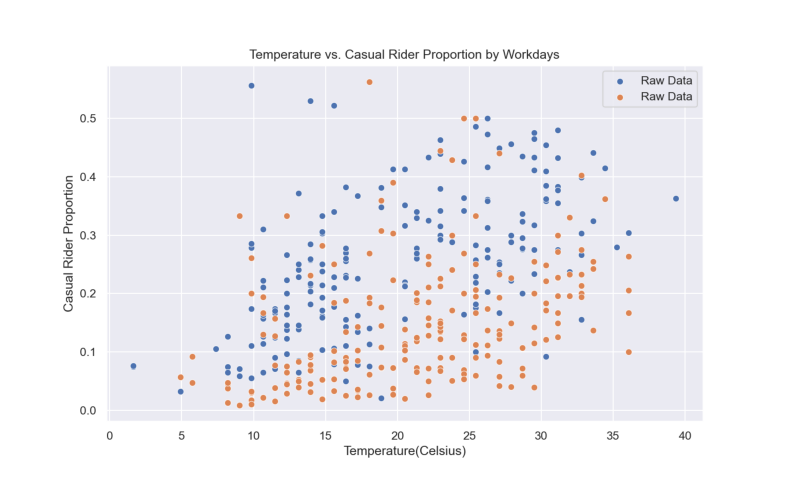

In [110]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = './scatter_plot.png'

img = Image.open(image_path)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

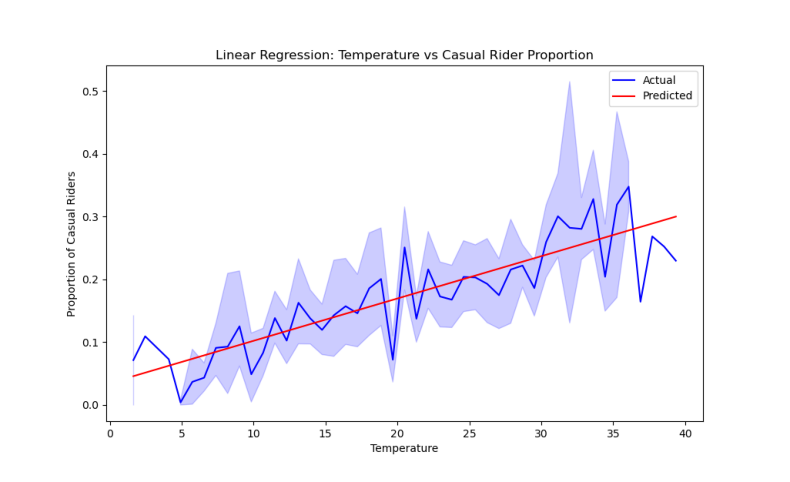

In [111]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = './model_plot.png'

img = Image.open(image_path)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


In [108]:
!dvc push

Pushing
!
  0% Checking cache in '1nwS0cuebPIGgrNYEdOC8v2ykgIi2ISKQ/files/md5'| |0/? [00:0
  0% Querying cache in '1nwS0cuebPIGgrNYEdOC8v2ykgIi2ISKQ/files/md5'| |1/256 [00
                                                                                
!
  0% Checking cache in '/Users/davidstreuli/Desktop/dvc-demo/dvc-demo/.dvc/cache
                                                                                
!
  0%|          |Pushing to gdrive                     0/2 [00:00<?,     ?file/s]
  0%|          |Pushing to gdrive                     0/2 [00:00<?,     ?file/s]

!

  0%|          |/Users/davidstreuli/Desktop/dvc0.00/24.6k [00:00<?,        ?B/s]

 33%|███▎      |/Users/davidstreuli/Deskto8.00k/24.6k [00:01<00:02,    6.24kB/s]

                                                                                
 50%|█████     |Pushing to gdrive                 1/2 [00:02<00:02,  2.30s/file]

!

  0%|          |/Users/davidstreuli/Desktop/dvc-0.00/732k [00:00<?,        ?B/s]

  1

## Demonstrate Change of Data

In [118]:
!dvc add data/bikesharing/train/bikeshare_v1.0.txt
!dvc push
!dvc repro


⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/davidstreuli/Desktop/dvc-demo/dvc-demo/.dvc/cache
                                                                                
!
  0%|          |Checking out /Users/davidstreuli/Deskt0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 42.69file/s]

To track the changes with git, run:

	git add data/bikesharing/train/bikeshare_v1.0.txt.dvc

To enable auto staging, run:

	dvc config core.autostage true
'data/bikesharing/train/bikeshare_v1.0.txt.dvc' didn't change, skipping         
'data/bikesharing/validation/validation.txt.dvc' didn't change, skipping        
Stage 'prepare' is cached - skipping run, checking out outputs                  
Updating lock file 'dvc.lock'                   

## Conclusion

Pros:
- Data Versioning: DVC enables **version control for datasets** and machine learning models, similar to how Git handles source code
- Efficient Storage: DVC avoids data duplication by **storing only the differences** between data versions, using external storage
- Collaboration: Improves productivity by allowing you to **collaborate on data and models** without needing to share large files.

Cons:
- Learning Curve
- Not Ideal for Small Projects
- Overhead in Workflow (Setup)
- Setup of Remote Storage (DVC App is currently blocked by Google, does not support environment variables)

## Take Home Message
Use data versioning for longterm ML projects that are collaborative or involve large datasets. DVC (the tool) is a great option for this.